Danny Abraham
<center><h1>CMPS 351</h1></center>
<center><h2>Assignment 8</h2></center>

In [530]:
import numpy as np
from numpy import linalg as la
from scipy.optimize import linprog as lp
import matplotlib.pyplot as plt
import cvxpy as cvx

## Problem in R
---

$ \min \; x^2 + 1 $

$ subject \; to (x - 2)(x - 4) \leq 0 $

#### Lagrangian

$ L(x, \lambda) = x^2 + 1 + \lambda(x^2 - 6x + 8) $ 

## Dual of a Quadratic Problem
---

#### Primal Problem

$$ minimize \; x^tx $$

$$ subject\;to \qquad Ax = b $$

$$ \qquad \lambda \geq 0 $$

#### Lagrangian

$$ L(x,\lambda) = x^tx - \lambda^t(Ax - b) $$

$$ \frac{\partial\lambda}{\partial x} = 2x - A^t\lambda$$

$$ \therefore x = \frac{A^t\lambda}{2}$$

#### Dual Problem

$$ g(x,\lambda) = \frac{(A^t\lambda)^t(A^t\lambda)}{4}-\lambda^t(\frac{AA^t\lambda}{2}-b) $$

$$ g(x,\lambda) = -\frac{\lambda^tAA^t\lambda}{4}+\lambda^tb $$

$$ \lambda \gt 0 $$

## Classification
---
#### Linearly Separable

In [531]:
size = 100
mult = 10
r = np.random.normal(size=size)
x = np.array(range(size))
r *= mult
r += x
r2 = np.random.normal(size=size)
x = np.array(range(size))
r2 *= mult
r2 -= x[::-1]
r = np.array(r)
r2 = np.array(r2)

y = np.array([r2,x])
x = np.array([r,x])

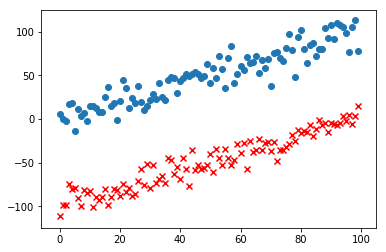

In [532]:
plt.scatter(range(size), r)
plt.scatter(range(size), r2, color='red', marker='x')

In [533]:
a = cvx.Variable(2)
b = cvx.Variable()

In [534]:
obj = cvx.Minimize(cvx.norm(a,2)/2)

In [535]:
x_constraints = [a.T * y.T[i] - b >=  1  for i in range(m)]
y_constraints = [a.T * x.T[i] - b <= -1 for i in range(n)]

constraints = x_constraints + y_constraints

In [536]:
prob = cvx.Problem(obj, constraints)
prob.solve()

0.027365452819881057

In [537]:
a.value

array([-0.04030501,  0.03702672])

In [538]:
b.value

array(2.06054416)

In [539]:
a = a.value
b = b.value

-111.33998918769134
113.0378711578301
-153.40767348910126
52.719921338481434


(0, 100)

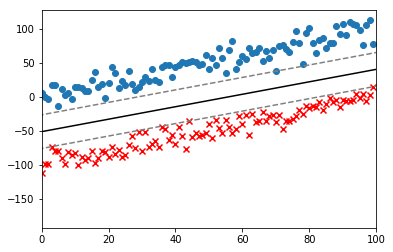

In [540]:
plt.scatter(range(size), r)
plt.scatter(range(size), r2, color='red', marker='x')

d1_min = np.min([x.T[:,0],y.T[:,0]])
d1_max = np.max([x.T[:,0],y.T[:,0]])

d2_atD1min = (-a[1]*d1_min + b ) / a[0]
d2_atD1max = (-a[1]*d1_max + b ) / a[0]

print(d1_min)
print(d1_max)
print(d2_atD1min)
print(d2_atD1max)
plt.plot([d1_min,d1_max],[d2_atD1min,d2_atD1max],color='black')

sup_up_atD1min = (-a[1]*d1_min + b + 1 ) / a[0]
sup_up_atD1max = (-a[1]*d1_max + b + 1 ) / a[0]
sup_dn_atD1min = (-a[1]*d1_min + b - 1 ) / a[0]
sup_dn_atD1max = (-a[1]*d1_max + b - 1 ) / a[0]

plt.plot([d1_min,d1_max],[sup_up_atD1min,sup_up_atD1max],'--',color='gray')
plt.plot([d1_min,d1_max],[sup_dn_atD1min,sup_dn_atD1max],'--',color='gray')

plt.xlim([0, 100])

#### Nonlinearly Separable

In [541]:
size = 100
mult = 30
r = np.random.normal(size=size)
x = np.array(range(size))
r *= mult
r += x
r2 = np.random.normal(size=size)
x = np.array(range(size))
r2 *= mult
r2 -= x[::-1]
r = np.array(r)
r2 = np.array(r2)

y = np.array([r2,x])
x = np.array([r,x])

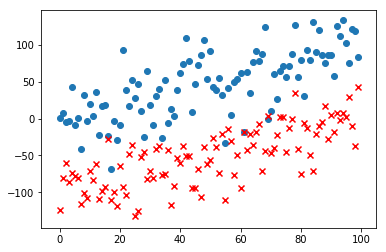

In [542]:
plt.scatter(range(size), r)
plt.scatter(range(size), r2, color='red', marker='x')

In [543]:
a = cvx.Variable(2)
b = cvx.Variable()

In [544]:
obj = cvx.Minimize(cvx.norm(a,2)/2)

In [545]:
x_constraints = [a.T * y.T[i] - b >=  1  for i in range(m)]
y_constraints = [a.T * x.T[i] - b <= -1 for i in range(n)]

constraints = x_constraints + y_constraints

In [546]:
prob = cvx.Problem(obj, constraints)
prob.solve()

inf

#### Pareto Optimization

In [662]:
size = 100
mult = 30
r = np.random.normal(size=size)
x = np.array(range(size))
r *= mult
r += x
r2 = np.random.normal(size=size)
x = np.array(range(size))
r2 *= mult
r2 -= x[::-1]
r = np.array(r)
r2 = np.array(r2)

y = np.array([r2,x])
x = np.array([r,x])

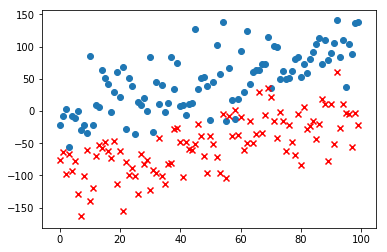

In [663]:
plt.scatter(range(size), r)
plt.scatter(range(size), r2, color='red', marker='x')

In [664]:
a = cvx.Variable(2)
b = cvx.Variable()
u = cvx.Variable(200)

In [665]:
alpha = 0.5
obj = cvx.Minimize(cvx.norm(a,2)/2 + alpha*np.ones(200)@u)

In [666]:
x_constraints = [a.T * y.T[i] - b + u[i]>=  1 for i in range(m)]
y_constraints = [a.T * x.T[i] - b - u[i + 100]<= -1 for i in range(n)]
u_constraints = [u[i] >= 0 for i in range(200)]

constraints = x_constraints + y_constraints + u_constraints

In [667]:
prob = cvx.Problem(obj, constraints)
prob.solve()

12.431569617941076

In [668]:
a.value

array([-0.07035445,  0.07731523])

In [669]:
b.value

array(3.88434622)

In [670]:
a = a.value
b = b.value

-163.0453547276108
140.8171198351167
-234.38795153886377
99.53829521929592


(0, 100)

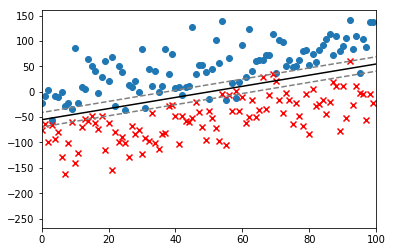

In [671]:
plt.scatter(range(size), r)
plt.scatter(range(size), r2, color='red', marker='x')

d1_min = np.min([x.T[:,0],y.T[:,0]])
d1_max = np.max([x.T[:,0],y.T[:,0]])

d2_atD1min = (-a[1]*d1_min + b ) / a[0]
d2_atD1max = (-a[1]*d1_max + b ) / a[0]

print(d1_min)
print(d1_max)
print(d2_atD1min)
print(d2_atD1max)
plt.plot([d1_min,d1_max],[d2_atD1min,d2_atD1max],color='black')

sup_up_atD1min = (-a[1]*d1_min + b + 1 ) / a[0]
sup_up_atD1max = (-a[1]*d1_max + b + 1 ) / a[0]
sup_dn_atD1min = (-a[1]*d1_min + b - 1 ) / a[0]
sup_dn_atD1max = (-a[1]*d1_max + b - 1 ) / a[0]

plt.plot([d1_min,d1_max],[sup_up_atD1min,sup_up_atD1max],'--',color='gray')
plt.plot([d1_min,d1_max],[sup_dn_atD1min,sup_dn_atD1max],'--',color='gray')

plt.xlim([0, 100])

In [578]:
l = list(range(500))

In [579]:
l = np.array(l)
l = l/250

In [580]:
l

array([0.   , 0.004, 0.008, 0.012, 0.016, 0.02 , 0.024, 0.028, 0.032,
       0.036, 0.04 , 0.044, 0.048, 0.052, 0.056, 0.06 , 0.064, 0.068,
       0.072, 0.076, 0.08 , 0.084, 0.088, 0.092, 0.096, 0.1  , 0.104,
       0.108, 0.112, 0.116, 0.12 , 0.124, 0.128, 0.132, 0.136, 0.14 ,
       0.144, 0.148, 0.152, 0.156, 0.16 , 0.164, 0.168, 0.172, 0.176,
       0.18 , 0.184, 0.188, 0.192, 0.196, 0.2  , 0.204, 0.208, 0.212,
       0.216, 0.22 , 0.224, 0.228, 0.232, 0.236, 0.24 , 0.244, 0.248,
       0.252, 0.256, 0.26 , 0.264, 0.268, 0.272, 0.276, 0.28 , 0.284,
       0.288, 0.292, 0.296, 0.3  , 0.304, 0.308, 0.312, 0.316, 0.32 ,
       0.324, 0.328, 0.332, 0.336, 0.34 , 0.344, 0.348, 0.352, 0.356,
       0.36 , 0.364, 0.368, 0.372, 0.376, 0.38 , 0.384, 0.388, 0.392,
       0.396, 0.4  , 0.404, 0.408, 0.412, 0.416, 0.42 , 0.424, 0.428,
       0.432, 0.436, 0.44 , 0.444, 0.448, 0.452, 0.456, 0.46 , 0.464,
       0.468, 0.472, 0.476, 0.48 , 0.484, 0.488, 0.492, 0.496, 0.5  ,
       0.504, 0.508,

In [581]:
a = cvx.Variable(2)
b = cvx.Variable()
u = cvx.Variable(200)

x_constraints = [a.T * y.T[i] - b + u[i]>=  1 for i in range(m)]
y_constraints = [a.T * x.T[i] - b - u[i + 100]<= -1 for i in range(n)]
u_constraints = [u[i] >= 0 for i in range(200)]

constraints = x_constraints + y_constraints + u_constraints

In [582]:
term1 = []
term2 = []

for i, alpha in enumerate(l):
    obj = cvx.Minimize(cvx.norm(a,2)/2 + alpha*np.ones(200)@u)
    prob = cvx.Problem(obj, constraints)
    prob.solve()
    term1.append(0.5*la.norm(a.value))
    term2.append(alpha*np.ones(200)@u.value)
    print(i, end='\r')

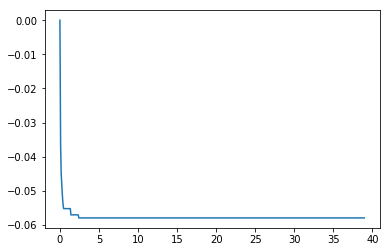

In [583]:
term1 = np.array(term1)
term2 = np.array(term2)
plt.plot(term2, -term1)

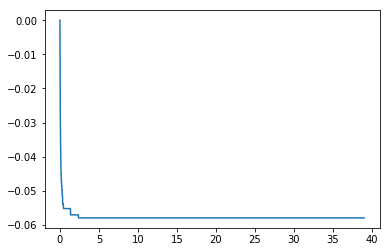

In [577]:
term1 = np.array(term1)
term2 = np.array(term2)
plt.plot(term2, -term1)

In [604]:
size = 100
mult = 10
r = np.random.normal(size=size)
x = np.array(range(size))
r *= mult
r += x
r2 = np.random.normal(size=size)
x = np.array(range(size))
r2 *= mult
r2 -= x[::-1]
r = np.array(r)
r2 = np.array(r2)

y = np.array([r2,x])
x = np.array([r,x])

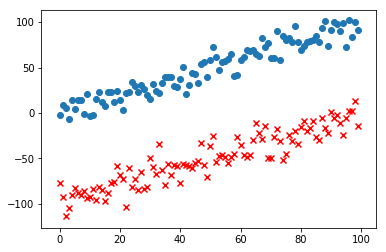

In [605]:
plt.scatter(range(size), r)
plt.scatter(range(size), r2, color='red', marker='x')

In [606]:
a = cvx.Variable(2)
b = cvx.Variable()
u = cvx.Variable(200)

In [607]:
alpha = 0.5
obj = cvx.Minimize(cvx.norm(a,2)/2 + alpha*np.ones(200)@u)

In [608]:
x_constraints = [a.T * y.T[i] - b + u[i]>=  1 for i in range(m)]
y_constraints = [a.T * x.T[i] - b - u[i + 100]<= -1 for i in range(n)]
u_constraints = [u[i] >= 0 for i in range(200)]

constraints = x_constraints + y_constraints + u_constraints

In [609]:
prob = cvx.Problem(obj, constraints)
prob.solve()

0.026412722653700486

In [610]:
a.value

array([-0.04255532,  0.03129812])

In [611]:
b.value

array(1.49434758)

In [612]:
a = a.value
b = b.value

-113.69477374989413
101.99899495710636
-118.73439289002302
39.90168886219849


(0, 100)

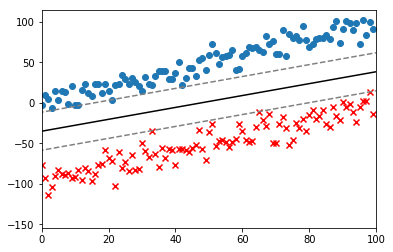

In [613]:
plt.scatter(range(size), r)
plt.scatter(range(size), r2, color='red', marker='x')

d1_min = np.min([x.T[:,0],y.T[:,0]])
d1_max = np.max([x.T[:,0],y.T[:,0]])

d2_atD1min = (-a[1]*d1_min + b ) / a[0]
d2_atD1max = (-a[1]*d1_max + b ) / a[0]

print(d1_min)
print(d1_max)
print(d2_atD1min)
print(d2_atD1max)
plt.plot([d1_min,d1_max],[d2_atD1min,d2_atD1max],color='black')

sup_up_atD1min = (-a[1]*d1_min + b + 1 ) / a[0]
sup_up_atD1max = (-a[1]*d1_max + b + 1 ) / a[0]
sup_dn_atD1min = (-a[1]*d1_min + b - 1 ) / a[0]
sup_dn_atD1max = (-a[1]*d1_max + b - 1 ) / a[0]

plt.plot([d1_min,d1_max],[sup_up_atD1min,sup_up_atD1max],'--',color='gray')
plt.plot([d1_min,d1_max],[sup_dn_atD1min,sup_dn_atD1max],'--',color='gray')

plt.xlim([0, 100])